# Lecture 12 - Probability Distributions, Z Scores and Normalization, (Logs)

In [2]:
import pandas as pd











#### Announcements:
* Quiz 3 graded. Common issues:
    * Properties of independence; e.g. $P(X=H)=P(X=H∣Y=H)+P(X=H∣Y=T)$
    * Values w/in $\pm$ 1 std deviation in a general distribution - I was wrong! I'll go back and give full credit for all answers.

In [8]:
zero_two = [0 for i in range(10)] + [2 for i in range(100)]
df = pd.DataFrame(zero_two)
df.std(), df.mean()

(0    0.577591
 dtype: float64,
 0    1.818182
 dtype: float64)

$P(Y=H | X=T) + P(Y=H | X=H) =1$

In [17]:
# [value for loop_var in collection]
[i**2 for i in range(1,10)]

[]

for _ in range(10):
    print("*", end="")
    
[0 for _ in range(10)]

**********

#### Goals:
* Know the general shape, parameters, and properties of some common probability distributions (uniform, binomial, Gaussian, power law)
* Be able to calculate and interpret $z$-scores
* (Know how to use list comprehensions.)

In [ ]:
zero_two = [0 for i in range(10)] + [2 for i in range(10)]
df = pd.DataFrame(zero_two)
df.std()

### Uniform Distribution

* Flip a fair coin.
* Roll a fair die.

In [18]:
import random
import seaborn as sns

<AxesSubplot:ylabel='Count'>

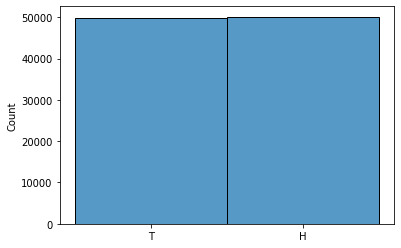

In [23]:
def flip_coins(N, bias=0.5):
    """ Flip N coins, return a list of the resutls """
    return random.choices(["H", "T"], weights=[bias, 1-bias], k=N)

N = 100000

sns.histplot(flip_coins(N))

<AxesSubplot:ylabel='Count'>

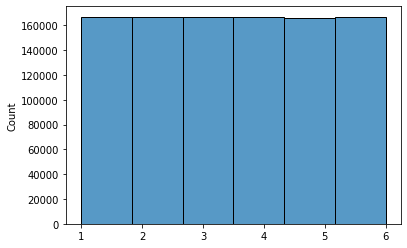

In [25]:
def roll_dice(N):
    """ Roll N fair 6-sided dice """
    return random.choices(range(1,7), k=N)

N = 1000000
sns.histplot(roll_dice(N), bins=6)



#### Uniform Distribution - Analytically:

Probability density function:

$P(X = x) = \frac{1}{K}$ where $K$ is the number of possible outcomes.

Properties
* Zero parameters - determined entirely by the sample space
* Discrete or continuous

**Exercise**: Can you think of something in real life that would be well modeled by a uniform distribution?

### Binomial Distribution

* Number of heads in N (not necessarily fair) coin flips.

In [37]:
def n_heads(flips):
    return sum([1 if x == "H" else 0 for x in flips])

n = 2000
N = 10000
results = [n_heads(flip_coins(n, bias=.1)) for _ in range(N)]
sns.histplot(results, bins=10)

<AxesSubplot:ylabel='Count'>

#### Binomial Distribution - Analytically:

$P(X = x) {n \choose x} p^x (1 - p)^{(n-x)}$ where:
* $p$ is the probability of one of the two possible outcomes.
* n is the number of repetitions of the experiment with those two outcomes

Properties of the binomial distribution:
* Two parameters ($p$ and $n$)
* As $n$ gets large, it converges to a Gaussian.

### Gaussian Distribution

* On the one hand, there's no intuitive dice-rolling/coin-flipping experiment that generates this distribution.
* On the other hand, a great many real-life experiments are at least close to Gaussian!

Examples of things that are Gaussian distributed in practice\*:
* heights of people
* life spans of people
* (certain types of) noise in your camera's pixel sensors

**\*** This requires conditions because reality is never simple: for heights, we'd need to:
* consider only males or females
* remove children
* remove the small populations of people with growth disorders or other conditions

<AxesSubplot:xlabel='Height', ylabel='Count'>

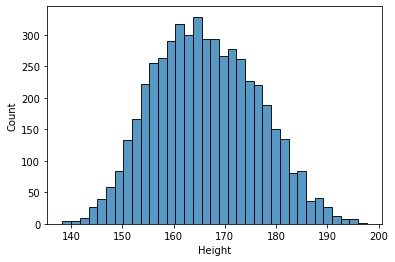

In [38]:
data_url = "https://fw.cs.wwu.edu/~wehrwes/courses/data311_21f/data/NHANES/NHANES.csv"
cols_renamed = {"SEQN": "SEQN",
                "RIAGENDR": "Gender", # 1 = M, 2 = F
                "RIDAGEYR": "Age", # years
                "BMXWT": "Weight", # kg
                "BMXHT": "Height", # cm
                "BMXLEG": "Leg", # cm
                "BMXARML": "Arm", # cm
                "BMXARMC": "Arm Cir", # cm
                "BMXWAIST": "Waist Cir"} # cm

df = pd.read_csv(data_url)
df = df.rename(cols_renamed, axis='columns')
df = df.drop("SEQN", axis='columns')
df = df[df["Age"] >= 21]
sns.histplot(x="Height", data=df)

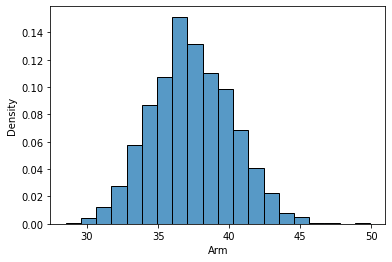

In [40]:
ax = sns.histplot(x="Arm", data=df, stat="density", bins=20)

<AxesSubplot:xlabel='Leg', ylabel='Count'>

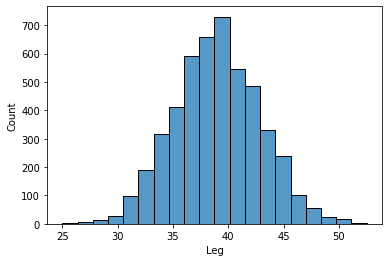

In [42]:
sns.histplot(x="Leg", data=df, bins=20)

#### Gaussian Distribution, Analytically

$P(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{\frac{-(x-\mu)^2}{2\sigma^2}}$ where:

* $\mu$ is the mean of the distribution
* $\sigma$ is the standard deviation

Properties:
* continuous
* always nicely bell shaped
* mathematically weird but extremely convenient (completely described by $\mu$ and $\sigma$!)
* theoretically infinite extent: probability of extremes is never 0 (but is *very* small)
* Satisfies friendly variance properties we saw last week:
  * 68% of values within $\pm$ 1 standard deviation
  * 95% within $\pm$ 2 standard deviations
  * 99.7% within $\pm$ 3 standard deviations

### Power Law Distributions

You might have heard of this if you've ever heard of "80/20" principle, or "the long tail", or "rich get richer" systems. This is when things are distributed according to an exponential curve.

Examples from real-life:
* Populations of cities
* Traffic to internet sites
* Frequency of word usage
* Frequency of earthquakes by magnitude

#### Power Law Distribution, Analytically:

$P(X=x) = cx^{-\alpha}$, where
* c is a relatively uninteresting normalization constant to make sure the total probability sums to 1
* $\alpha$ determines how steep the falloff is. Specifically: $P(X=2x)$ is $\frac{1}{2^\alpha}$ of $P(x)$.
  * Personal wealth: if about $\frac{1}{4}$ of people have net worth $2x$ as have net worth $x$, then $\alpha = 2$.
  * If the power law holds and Jeff Bezos is the richest person at 190 billion, then:

In [44]:
worth_millions = 190000
count = 1
worths = []
counts = []
for i in range(10):
    worths.append(worth_millions)
    counts.append(count)
    worth_millions = worth_millions / 2
    count = count * 4

    
df = pd.DataFrame({"Worth": worths, "Count": counts})
df

Worth   Count
0  190000.00000       1
1   95000.00000       4
2   47500.00000      16
3   23750.00000      64
4   11875.00000     256
5    5937.50000    1024
6    2968.75000    4096
7    1484.37500   16384
8     742.18750   65536
9     371.09375  262144

<AxesSubplot:xlabel='Worth', ylabel='Count'>

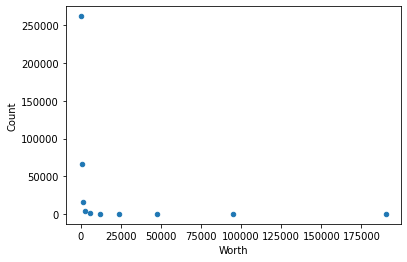

In [45]:
df.plot.scatter(x="Worth", y="Count")

Properties of power law distributions:
* One parameter ($\alpha$)
* The mean is nonsense
* The standard deviation is nonsense

![](linear_height.png)
(image source: https://capitalaspower.com/2019/10/visualizing-power-law-distributions/)

* On a **log-log** plot, a power law shows up as a straight line:

In [46]:
df.plot.scatter(x="Worth", y="Count", loglog=True)

<AxesSubplot:xlabel='Worth', ylabel='Count'>

## Z-Scores and Normalization



In the NHANES dataset, heights and other length measurements are given in centimeters. I don't have intuition for what's a normal height in centimeters - if you're 160cm tall, are you short? tall? average? One thing I could do is convert to feet and inches which I do know. But sometimes you don't have any units that are intuitive.

In [ ]:
data_url = "https://fw.cs.wwu.edu/~wehrwes/courses/data311_21f/data/NHANES/NHANES.csv"
cols_renamed = {"SEQN": "SEQN",
                "RIAGENDR": "Gender", # 1 = M, 2 = F
                "RIDAGEYR": "Age", # years
                "BMXWT": "Weight", # kg
                "BMXHT": "Height", # cm
                "BMXLEG": "Leg", # cm
                "BMXARML": "Arm", # cm
                "BMXARMC": "Arm Cir", # cm
                "BMXWAIST": "Waist Cir"} # cm

df = pd.read_csv(data_url)
df = df.rename(cols_renamed, axis='columns')
df = df.drop("SEQN", axis='columns')
df = df[df["Age"] >= 21]

In [ ]:
ht_col = df["Height"]
ht_col

To compute a $z$-score:
1. Subtract the mean
2. Divide by the standard deviation.

In [ ]:
df["Height-z"] = (ht_col - ht_col.mean()) / ht_col.std()
df["Height-z"]

In [ ]:
sns.histplot(x="Height-z", data=df)

Now instead of the raw data value, you have an interpretable measure of how close each point is to the mean. If you have an approximately-Gaussian distribution, you also have a good idea of how unusual that point is!